# Rain Prediction


### Introduction


Rain prediction is a crucial aspect of meteorology, playing an essential role in various sectors including agriculture, water resource management, disaster prevention, and daily activities. Accurate rain prediction helps mitigate risks associated with severe weather conditions, optimizes agricultural planning, and informs public safety measures.

Importance of Rain Prediction
* Agriculture: Farmers rely on rain predictions to plan their planting and harvesting schedules, irrigation needs, and crop selection. Accurate predictions can prevent crop loss due to unexpected weather changes.
* Water Resource Management: Rain predictions help in managing reservoirs, dams, and water distribution systems. Anticipating rainfall allows for better planning and storage of water resources.
* Disaster Prevention: Predicting heavy rainfall and storms can aid in disaster preparedness, such as flood warnings and evacuation plans. This is critical in minimizing the impact of natural disasters on communities.
* Daily Activities: Rain forecasts are essential for daily planning, influencing decisions on travel, outdoor activities, and public events.

Data Used in Rain Prediction
Rain prediction models use a variety of data sources, including:

* Historical Weather Data: Past records of temperature, humidity, wind speed, and precipitation.
* Satellite Imagery: Real-time images of cloud formations and weather systems.
* Statistical Methods: Traditional methods like regression analysis, time series analysis, and Markov chains.
* Machine Learning Models: Algorithms like decision trees, random forests, support vector machines (SVM), and neural networks. In this project, we are using Random Forest Machine Learning Model to Train the model.

Let's consider an example where we predict whether it will rain tomorrow based on historical weather data. The dataset includes various features such as temperature, humidity, wind speed, and past rainfall.

Here's a brief workflow to build a rain prediction model:

* Data Preprocessing: Clean the data, handle missing values, and convert categorical variables to numerical formats.
* Undersampling/ DownSampling the dataset 
* Exploratory Data Analysis (EDA): Understand the data distribution, relationships between variables, and identify important features.
* Feature Engineering: Create new features or modify existing ones to improve model performance.
* Model Building: Train a machine learning model (e.g., Random Forest) using the preprocessed data.
* Model Evaluation: Assess the model's performance using metrics like accuracy, precision, recall, and ROC-AUC.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
dataset = pd.read_csv('weatherAUS.csv')

In [3]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

since data from various columns is missing, we need solve that problem


In [7]:
dataset.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          679
Evaporation       356
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           440
Temp3pm           500
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

In [8]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,67816,47.692924
Evaporation,60843,42.789026
Cloud3pm,57094,40.152469
Cloud9am,53657,37.735332
Pressure9am,14014,9.855619
Pressure3pm,13981,9.832411
WindDir9am,10013,7.041838
WindGustDir,9330,6.561504
WindGustSpeed,9270,6.519308
WindDir3pm,3778,2.656952


In [9]:
# returning how many duplicate rows are there
dataset.duplicated().sum()

0

# Data Preprocessing 

In [10]:
# getting the columns where the null values' avg % below 5

cols = [var for var in dataset.columns if dataset[var].isnull().mean()*100<5 
        and dataset[var].isnull().mean()*100 >0]

In [11]:
print("Shape of dataframe before dropping missing values: ", dataset.shape)

Shape of dataframe before dropping missing values:  (142193, 24)


In [12]:
cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [13]:
dataset = dataset.dropna(subset=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow'])

In [14]:
# getting the columns where the null values' avg % below 5

cols2 = [var for var in dataset.columns if dataset[var].isnull().mean()*100> 0 
        and dataset[var].isnull().mean()*100 <5 ]
cols2

['WindGustDir', 'WindGustSpeed']

In [15]:
print("Shape of dataframe after dropping missing values: ", dataset.shape)

Shape of dataframe after dropping missing values:  (134590, 24)


In [16]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,61854,45.957352
Evaporation,56101,41.682889
Cloud3pm,51552,38.302994
Cloud9am,50169,37.275429
Pressure9am,11215,8.332714
Pressure3pm,11151,8.285162
WindDir9am,7557,5.614830
WindGustDir,6014,4.468385
WindGustSpeed,6001,4.458727
Date,0,0.000000


In [17]:
dataset.dropna(subset=['WindGustDir', 'WindGustSpeed'], inplace=True)

In [18]:
print("Shape of dataframe After dropping missing values: ",dataset.shape)

Shape of dataframe After dropping missing values:  (128576, 24)


Targetting Columns having % of Null values greater than 5 and Lesser than 10

In [19]:
cols3 = [var for var in dataset.columns if dataset[var].isnull().mean()*100> 5 
        and dataset[var].isnull().mean()*100 <10 ]
cols3

['WindDir9am', 'Pressure9am', 'Pressure3pm']

In [20]:
num_cols = ['WindGustSpeed', 'Pressure9am', 'Pressure3pm']
category_cols = ['WindDir9am']

We have to decided whether to use mean, mode or median for Imputation now, we will use BoxPlot for it

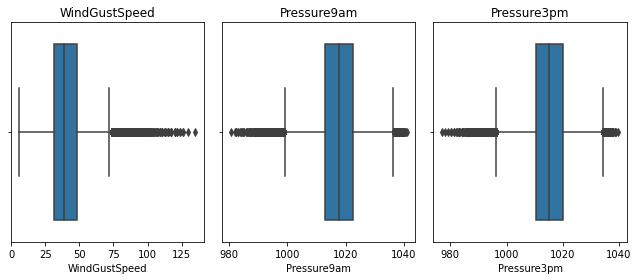

In [21]:
plt.figure(figsize=(9,4))
for i , cols in enumerate(num_cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(data=dataset, x=cols)
    plt.title(f'{cols}')
plt.tight_layout()
plt.show()

Result:

> Data is Skewed, There are many datapoints that act as outliers
> Outliers data pts will have a significant impact on the mean and hence, in such cases it is NOT recommended to use the Mean for replacing the missing values
> using mean value for replacing missing values may not create a great model
> Hence we use Median for Imputation, as the Median is less Sensitive to outliers than the Mean

In [22]:
dataset['WindGustSpeed'] = dataset['WindGustSpeed'].fillna(dataset['WindGustSpeed'].median())

dataset['Pressure9am'] = dataset['Pressure9am'].fillna(dataset['Pressure9am'].median())

dataset['Pressure3pm'] = dataset['Pressure3pm'].fillna(dataset['Pressure3pm'].median())

In [23]:

dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])

In [24]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,59694,46.427016
Evaporation,53996,41.995396
Cloud3pm,51137,39.771808
Cloud9am,49753,38.695402
Date,0,0.000000
Humidity9am,0,0.000000
RISK_MM,0,0.000000
RainToday,0,0.000000
Temp3pm,0,0.000000
Temp9am,0,0.000000


Now we will impute the Columns Evaporation, Sunshine, Cloud9am, Cloud3pm

In [25]:
dataset['Cloud9am_imputed'] = dataset['Cloud9am']

In [26]:
dataset['Cloud9am_imputed'][dataset['Cloud9am_imputed'].isnull()] = dataset['Cloud9am'].dropna().sample(dataset['Cloud9am'].isnull().sum(), replace=True).values

C:\Users\asus\AppData\Local\Temp\ipykernel_2572\1971846146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cloud9am_imputed'][dataset['Cloud9am_imputed'].isnull()] = dataset['Cloud9am'].dropna().sample(dataset['Cloud9am'].isnull().sum(), replace=True).values


In [27]:
dataset['Evaporation_imputed'] = dataset['Evaporation']

In [28]:
dataset['Evaporation_imputed'][dataset['Evaporation_imputed'].isnull()] = dataset['Evaporation'].dropna().sample(dataset['Evaporation'].isnull().sum(), replace=True).values

C:\Users\asus\AppData\Local\Temp\ipykernel_2572\317538280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Evaporation_imputed'][dataset['Evaporation_imputed'].isnull()] = dataset['Evaporation'].dropna().sample(dataset['Evaporation'].isnull().sum(), replace=True).values


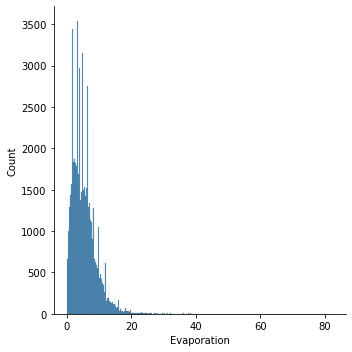

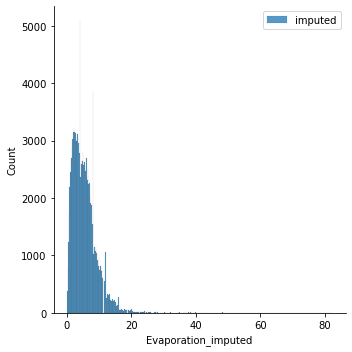

In [29]:
sns.displot(dataset['Evaporation'], label='original' )
sns.displot(dataset['Evaporation_imputed'], label='imputed')

plt.legend()
plt.show()

In [30]:
dataset[['Evaporation','Evaporation_imputed']].var()

Evaporation            17.613197
Evaporation_imputed    17.864821
dtype: float64

In [31]:
dataset['Sunshine_imputed'] = dataset['Sunshine']

In [32]:
dataset['Sunshine_imputed'][dataset['Sunshine_imputed'].isnull()] = dataset['Sunshine'].dropna().sample(dataset['Sunshine'].isnull().sum(), replace = True).values

C:\Users\asus\AppData\Local\Temp\ipykernel_2572\2970392735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sunshine_imputed'][dataset['Sunshine_imputed'].isnull()] = dataset['Sunshine'].dropna().sample(dataset['Sunshine'].isnull().sum(), replace = True).values


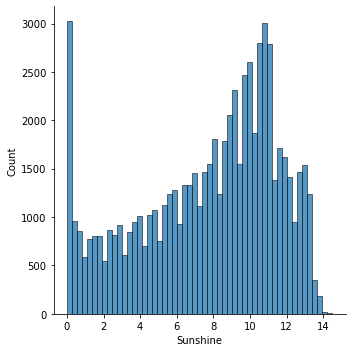

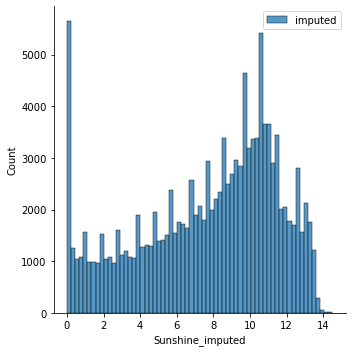

In [33]:
sns.displot(dataset['Sunshine'], label='original')
sns.displot(dataset['Sunshine_imputed'], label='imputed')

plt.legend()
plt.show()

In [34]:
dataset['Cloud3pm_imputed'] = dataset['Cloud3pm']

In [35]:
dataset['Cloud3pm_imputed'][dataset['Cloud3pm_imputed'].isnull()] = dataset['Cloud3pm'].dropna().sample(dataset['Cloud3pm'].isnull().sum(), replace = True).values

C:\Users\asus\AppData\Local\Temp\ipykernel_2572\100487546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cloud3pm_imputed'][dataset['Cloud3pm_imputed'].isnull()] = dataset['Cloud3pm'].dropna().sample(dataset['Cloud3pm'].isnull().sum(), replace = True).values


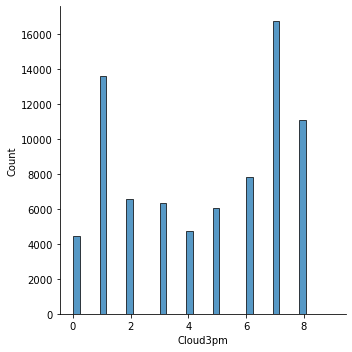

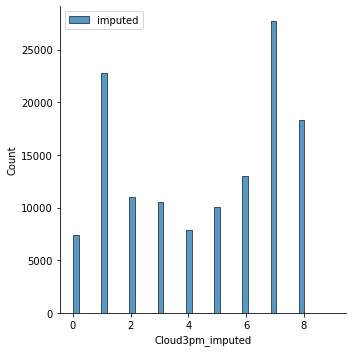

In [36]:
sns.displot(dataset['Cloud3pm'], label="original")
sns.displot(dataset['Cloud3pm_imputed'], label="imputed")

plt.legend()
plt.show()

In [37]:
dataset[['Cloud3pm', 'Cloud3pm_imputed']].var()

Cloud3pm            7.399857
Cloud3pm_imputed    7.406690
dtype: float64

In [38]:
no = dataset.isnull().sum()
percent = no / len(dataset)*100

missing_values = pd.DataFrame({"Total No.": no, "Percentage":percent}).sort_values(ascending=False, by='Percentage')
missing_values

,Total No.,Percentage
Sunshine,59694,46.427016
Evaporation,53996,41.995396
Cloud3pm,51137,39.771808
Cloud9am,49753,38.695402
Date,0,0.000000
Pressure9am,0,0.000000
Sunshine_imputed,0,0.000000
Evaporation_imputed,0,0.000000
Cloud9am_imputed,0,0.000000
RainTomorrow,0,0.000000


In [39]:
dataset=dataset.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

In [40]:
dataset.isnull().sum().sum()

0

In [41]:
dataset.isnull().sum().sum()

0

In [42]:
dataset['RainTomorrow'] = dataset['RainTomorrow'].replace({'No':0, 'Yes':1})

In [43]:
cat_cols= dataset.select_dtypes(include="object").columns.to_list()
cat_cols

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [44]:
cat_cols.remove('Date')

In [45]:
cat_cols.remove("RainToday")

let's do One Hot Encoding of categorical variable.

get k-1 dummy variables after One Hot Encoding

In [46]:
dataset = pd.get_dummies(dataset, columns=cat_cols, drop_first=True)

In [47]:
dataset.drop('Date', axis=1, inplace=True)

In [48]:
pd.set_option('display.max_columns', None)

dataset.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Cloud9am_imputed,Evaporation_imputed,Sunshine_imputed,Cloud3pm_imputed,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,0,8.0,15.2,5.9,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,0,0.0,5.6,5.4,7.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,0,2.0,6.8,8.8,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,0,1.0,8.8,4.9,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,0,7.0,6.6,0.3,8.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
dataset['RainToday'] = dataset['RainToday'].replace({'No':0, 'Yes':1})

In [50]:
dataset.shape

(128576, 110)

# Model Training and Testing

In [51]:
X = dataset.drop(["RainTomorrow"], axis=1)
y = dataset["RainTomorrow"]

In [52]:
from sklearn.preprocessing import RobustScaler

scalar = RobustScaler()

X_scaled = scalar.fit_transform(X)

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

We will be using Random Forest Classifier as our model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier()

In [57]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_test = rf.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 1.0000


In [61]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))


Training set score: 1.0000
Test set score: 1.0000


We get an accuracy of 100% using both training as well as testing datasets. Hence, we can say that our model fits the perfectly